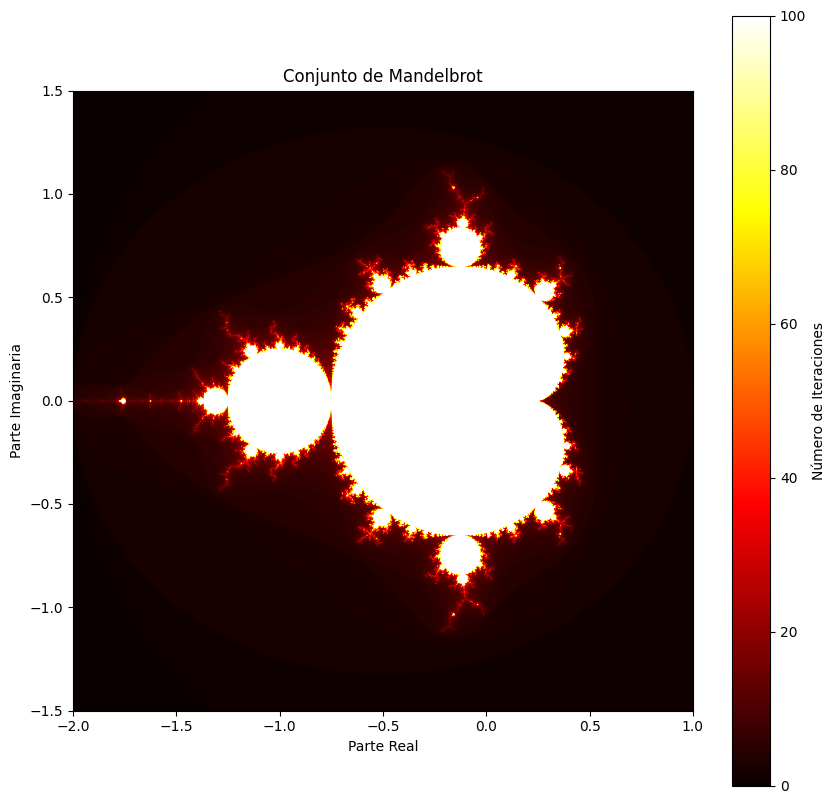

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def generate_mandelbrot(height, width, max_iter, x_range, y_range):
    # Crear la grilla de números complejos en el rango especificado
    real = np.linspace(x_range[0], x_range[1], width)
    imag = np.linspace(y_range[0], y_range[1], height)
    real, imag = np.meshgrid(real, imag)
    c = real + 1j * imag  # Crear la grilla de números complejos

    # Inicializar z con ceros (z = 0 + 0i)
    z = np.zeros_like(c, dtype=np.complex128)

    # Inicializar un array para almacenar el número de iteraciones
    iterations = np.zeros_like(c, dtype=int)

    # Crear una máscara para llevar un registro de los puntos que no han escapado
    mask = np.ones_like(c, dtype=bool)

    for i in range(max_iter):
        z[mask] = z[mask]**2 + c[mask]  # Aplicar la función f(z) = z^2 + c
        mask = (np.abs(z) <= 2)         # Actualizar la máscara para puntos que no han escapado
        iterations[mask] += 1           # Incrementar el conteo de iteraciones para esos puntos

    return iterations

# Generar el conjunto de Mandelbrot
height = 800
width = 800
max_iter = 100
x_range = (-2.0, 1.0)  # Rango del eje real
y_range = (-1.5, 1.5)  # Rango del eje imaginario

mandelbrot_set = generate_mandelbrot(height, width, max_iter, x_range, y_range)

# Visualizar usando Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(mandelbrot_set, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='hot')
plt.colorbar(label='Número de Iteraciones')
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.show()



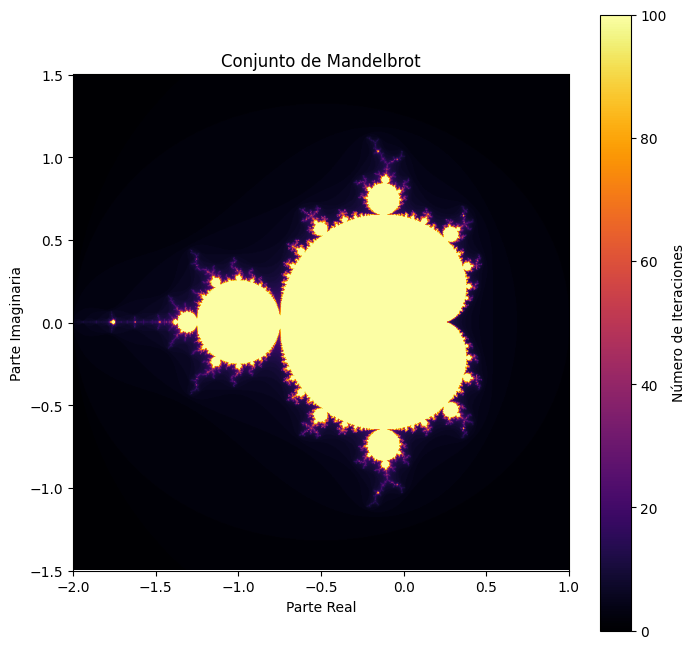

In [60]:
import matplotlib.pyplot as plt

def plot_mandelbrot(mandelbrot_array, x_range=(-2.0, 1.0), y_range=(-1.5, 1.5)):
    """
    Visualiza el conjunto de Mandelbrot usando Matplotlib.

    Parámetros:
    - mandelbrot_array: array 2D de números de iteraciones generados.
    - x_range: rango de valores del eje real (por defecto: (-2.0, 1.0)).
    - y_range: rango de valores del eje imaginario (por defecto: (-1.5, 1.5)).
    """
    plt.figure(figsize=(8, 8))
    # Mostrar la imagen con un colormap adecuado
    plt.imshow(mandelbrot_array, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='inferno')
    # Añadir una barra de colores para mostrar las iteraciones
    plt.colorbar(label='Número de Iteraciones')
    # Añadir título y etiquetas de los ejes
    plt.title('Conjunto de Mandelbrot')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    # Mostrar la gráfica
    plt.show()

# Ejemplo de uso:
height = 800
width = 800
max_iter = 100
x_range = (-2.0, 1.0)
y_range = (-1.5, 1.5)

# Generamos el conjunto de Mandelbrot
mandelbrot_set = generate_mandelbrot(height, width, max_iter, x_range, y_range)

# Llamamos a la función de visualización
plot_mandelbrot(mandelbrot_set, x_range, y_range)


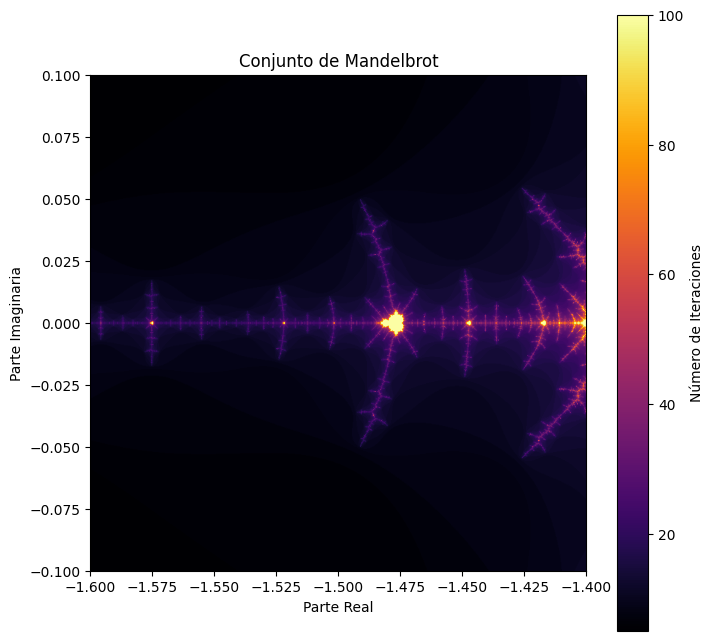

In [61]:
def zoom_mandelbrot(center, zoom_factor, height=800, width=800, max_iter=100):
    """
    Realiza zoom en una parte específica del conjunto de Mandelbrot y lo visualiza.

    Parámetros:
    - center: tupla (center_real, center_imag) representando el centro del zoom en el plano complejo.
    - zoom_factor: el factor por el cual se reducirá el área visible.
    - height: altura de la imagen en píxeles (por defecto 800).
    - width: anchura de la imagen en píxeles (por defecto 800).
    - max_iter: número máximo de iteraciones para calcular el conjunto de Mandelbrot.
    """
    center_real, center_imag = center

    # Rango inicial para el conjunto de Mandelbrot (sin zoom)
    x_range = (-2.0, 1.0)
    y_range = (-1.5, 1.5)

    # Calcular el nuevo rango después del zoom
    x_span = (x_range[1] - x_range[0]) / zoom_factor
    y_span = (y_range[1] - y_range[0]) / zoom_factor

    # Definir los nuevos rangos centrados en el punto especificado
    new_x_range = (center_real - x_span / 2, center_real + x_span / 2)
    new_y_range = (center_imag - y_span / 2, center_imag + y_span / 2)

    # Generar el conjunto de Mandelbrot para el área zoom
    zoomed_mandelbrot = generate_mandelbrot(height, width, max_iter, new_x_range, new_y_range)

    # Visualizar el conjunto de Mandelbrot zoom
    plot_mandelbrot(zoomed_mandelbrot, new_x_range, new_y_range)

# Ejemplo de uso:
center = (-1.5, 0)  # Punto en el plano complejo
zoom_factor = 15     # Factor de zoom (aumenta 5x)
zoom_mandelbrot(center, zoom_factor)


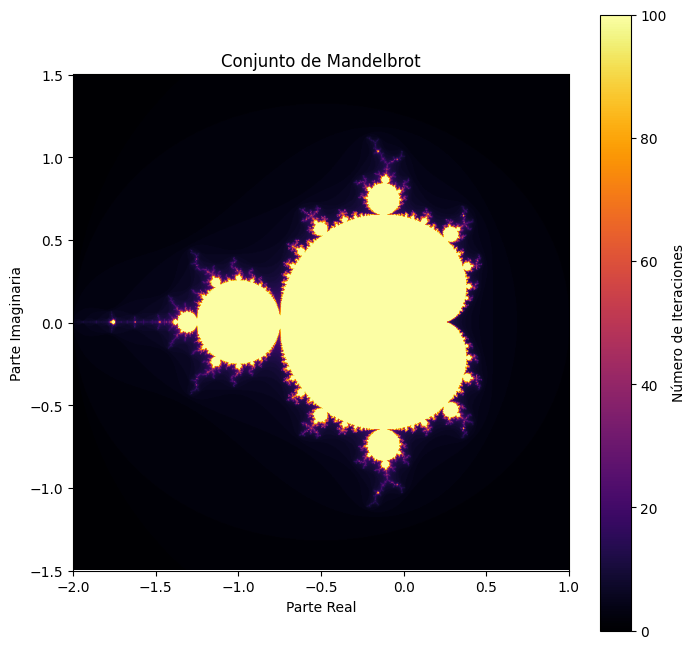

In [62]:
import numpy as np

def generate_mandelbrot_with_periodicity(height, width, max_iter, x_range, y_range, periodicity_check_iter=10):
    """
    Genera el conjunto de Mandelbrot con comprobación de periodicidad.

    Parámetros:
    - height: Altura de la imagen en píxeles.
    - width: Anchura de la imagen en píxeles.
    - max_iter: Número máximo de iteraciones.
    - x_range: Rango del eje real (x_min, x_max).
    - y_range: Rango del eje imaginario (y_min, y_max).
    - periodicity_check_iter: Número de iteraciones tras las cuales verificar la periodicidad.

    Retorna:
    - Un array 2D con el número de iteraciones en cada punto.
    """
    # Crear la grilla de números complejos
    real = np.linspace(x_range[0], x_range[1], width)
    imag = np.linspace(y_range[0], y_range[1], height)
    real, imag = np.meshgrid(real, imag)
    c = real + 1j * imag

    # Inicializar z y el array de iteraciones
    z = np.zeros_like(c, dtype=np.complex128)
    iterations = np.zeros_like(c, dtype=int)
    mask = np.ones_like(c, dtype=bool)

    # Array para guardar z en iteraciones anteriores y detectar periodicidad
    previous_z = np.zeros_like(c, dtype=np.complex128)

    for i in range(max_iter):
        z[mask] = z[mask]**2 + c[mask]  # Aplicar f(z) = z^2 + c
        mask = (np.abs(z) <= 2)         # Actualizar máscara de puntos no escapados
        iterations[mask] += 1

        # Comprobación de periodicidad cada periodicity_check_iter iteraciones
        if i % periodicity_check_iter == 0:
            cycle_mask = np.abs(z - previous_z) < 1e-6  # Detectar ciclos
            mask[cycle_mask] = False                   # Marcar puntos periódicos como escapados
            previous_z = np.copy(z)                    # Guardar z para la siguiente verificación

    return iterations

# Ejemplo de uso:
height = 800
width = 800
max_iter = 100
x_range = (-2.0, 1.0)
y_range = (-1.5, 1.5)

# Generar el conjunto de Mandelbrot con comprobación de periodicidad
mandelbrot_set_periodic = generate_mandelbrot_with_periodicity(height, width, max_iter, x_range, y_range)

# Visualizar el conjunto generado con periodicidad
plot_mandelbrot(mandelbrot_set_periodic, x_range, y_range)


In [63]:
import time

# Sin comprobación de periodicidad
start = time.time()
mandelbrot_set = generate_mandelbrot(height, width, max_iter, x_range, y_range)
end = time.time()
print(f"Tiempo sin comprobación de periodicidad: {end - start:.4f} segundos")

# Con comprobación de periodicidad
start = time.time()
mandelbrot_set_periodic = generate_mandelbrot_with_periodicity(height, width, max_iter, x_range, y_range)
end = time.time()
print(f"Tiempo con comprobación de periodicidad: {end - start:.4f} segundos")


Tiempo sin comprobación de periodicidad: 0.8806 segundos
Tiempo con comprobación de periodicidad: 0.9508 segundos


In [64]:
import numpy as np
import matplotlib.pyplot as plt

def generate_mandelbrot_with_distance(height, width, max_iter, x_range, y_range):
    """
    Genera el conjunto de Mandelbrot con estimación de distancia para puntos dentro del conjunto.

    Parámetros:
    - height: Altura de la imagen en píxeles.
    - width: Anchura de la imagen en píxeles.
    - max_iter: Número máximo de iteraciones.
    - x_range: Rango del eje real (x_min, x_max).
    - y_range: Rango del eje imaginario (y_min, y_max).

    Retorna:
    - Un array 2D con la estimación de distancia para cada punto.
    """
    # Crear la grilla de números complejos
    real = np.linspace(x_range[0], x_range[1], width)
    imag = np.linspace(y_range[0], y_range[1], height)
    real, imag = np.meshgrid(real, imag)
    c = real + 1j * imag

    # Inicializar z y la derivada dz/dc
    z = np.zeros_like(c, dtype=np.complex128)
    dz = np.ones_like(c, dtype=np.complex128)  # Derivada de f(z) respecto a c

    # Inicializar el array de iteraciones y distancia
    distance = np.zeros_like(c, dtype=np.float64)
    iterations = np.zeros_like(c, dtype=int)

    # Máscara para los puntos que no han escapado
    mask = np.ones_like(c, dtype=bool)

    for i in range(max_iter):
        z[mask] = z[mask]**2 + c[mask]      # f(z) = z^2 + c
        dz[mask] = 2 * z[mask] * dz[mask]   # Derivada de f(z) con respecto a c

        # Actualizar la máscara de puntos no escapados
        mask = (np.abs(z) <= 2)
        iterations[mask] += 1

        # Estimación de la distancia para puntos que no han escapado
        # Solo actualizamos la distancia para los puntos que están cerca del borde
        distance[mask] = 0.5 * np.log(np.abs(z[mask])) / np.abs(dz[mask])

    return distance, iterations

# Ejemplo de uso:
height = 800
width = 800
max_iter = 100
x_range = (-2.0, 1.0)
y_range = (-1.5, 1.5)

# Generar el conjunto de Mandelbrot con estimación de distancia
distance_array, iteration_array = generate_mandelbrot_with_distance(height, width, max_iter, x_range, y_range)


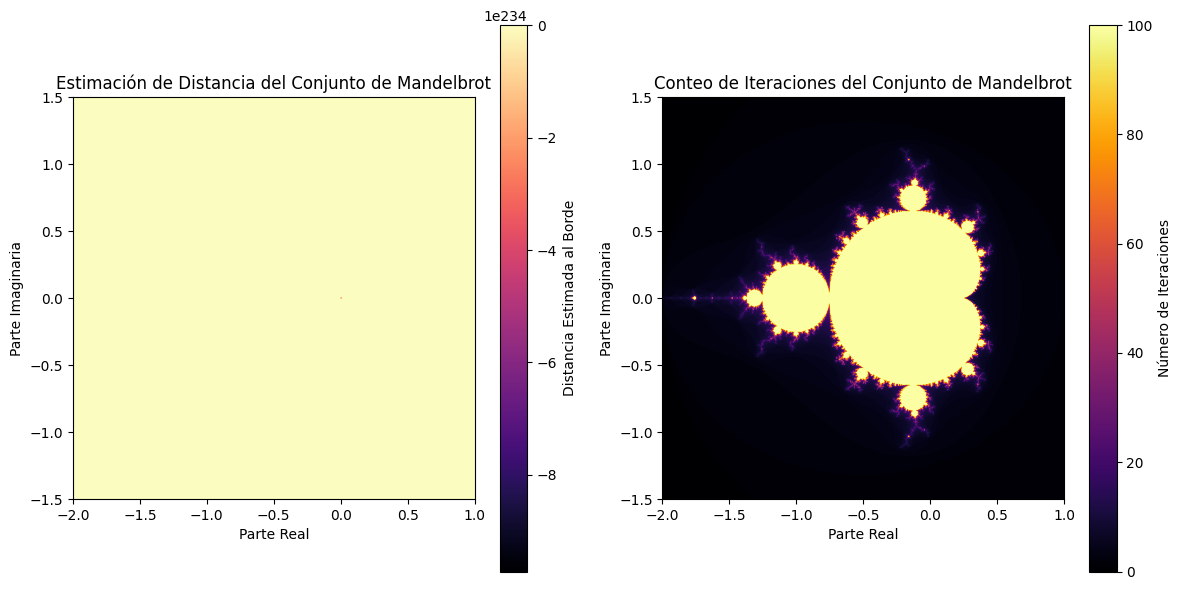

In [65]:
def plot_comparison(distance_array, iteration_array, x_range, y_range):
    """
    Visualiza y compara la estimación de distancia y el conteo de iteraciones.

    Parámetros:
    - distance_array: array 2D con las estimaciones de distancia.
    - iteration_array: array 2D con el número de iteraciones.
    - x_range: rango del eje real (x_min, x_max).
    - y_range: rango del eje imaginario (y_min, y_max).
    """
    plt.figure(figsize=(12, 6))

    # Visualización de la estimación de distancia
    plt.subplot(1, 2, 1)
    plt.imshow(distance_array, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='magma')
    plt.colorbar(label='Distancia Estimada al Borde')
    plt.title('Estimación de Distancia del Conjunto de Mandelbrot')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')

    # Visualización del conteo de iteraciones
    plt.subplot(1, 2, 2)
    plt.imshow(iteration_array, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='inferno')
    plt.colorbar(label='Número de Iteraciones')
    plt.title('Conteo de Iteraciones del Conjunto de Mandelbrot')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')

    plt.tight_layout()
    plt.show()

# Comparación visual:
plot_comparison(distance_array, iteration_array, x_range, y_range)


In [67]:
def plot_mandelbrot(ax, mandelbrot_array, x_range, y_range):
    """
    Función para visualizar el conjunto de Mandelbrot.

    Parámetros:
    - ax: El eje en el que se dibuja la imagen.
    - mandelbrot_array: array 2D con el número de iteraciones.
    - x_range: Rango del eje real.
    - y_range: Rango del eje imaginario.
    """
    ax.imshow(mandelbrot_array, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='inferno')
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginaria')


Animación guardada como mandelbrot_zoom.gif


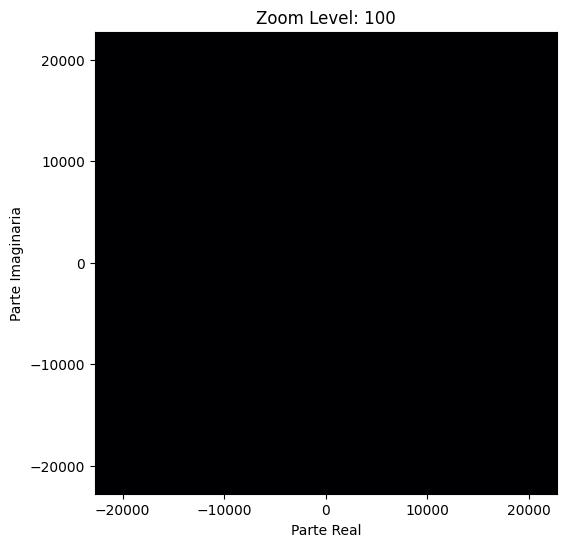

In [68]:
def animate_mandelbrot(zoom_factor=1.5, zoom_steps=60, max_iter=100, save_as_gif=False, gif_name='mandelbrot.gif'):
    """
    Crea una animación del conjunto de Mandelbrot que hace zoom y permite guardarlo como un GIF.

    Parámetros:
    - zoom_factor: Factor de zoom en cada paso.
    - zoom_steps: Número de pasos de la animación.
    - max_iter: Número máximo de iteraciones.
    - save_as_gif: Indica si se guarda la animación como un GIF.
    - gif_name: Nombre del archivo GIF.
    """
    # Inicializar la figura
    fig, ax = plt.subplots(figsize=(6, 6))

    # Definir la región inicial de zoom
    center_x, center_y = -0.75, 0.0  # Parte interesante del conjunto
    zoom = 1.0
    x_range = (-2.0, 1.0)
    y_range = (-1.5, 1.5)

    # Función de actualización para la animación
    def update(frame):
        nonlocal x_range, y_range, zoom
        ax.clear()

        # Ajustar los límites de zoom
        zoom /= zoom_factor
        new_x_range = ((center_x - (x_range[1] - x_range[0]) / (2 * zoom)),
                       (center_x + (x_range[1] - x_range[0]) / (2 * zoom)))
        new_y_range = ((center_y - (y_range[1] - y_range[0]) / (2 * zoom)),
                       (center_y + (y_range[1] - y_range[0]) / (2 * zoom)))

        # Generar el conjunto de Mandelbrot en el área de zoom actual
        mandelbrot_array = generate_mandelbrot(800, 800, max_iter, new_x_range, new_y_range)

        # Dibujar el conjunto de Mandelbrot en el nuevo nivel de zoom
        plot_mandelbrot(ax, mandelbrot_array, new_x_range, new_y_range)
        ax.set_title(f'Zoom Level: {frame + 1}')

    # Crear la animación
    anim = FuncAnimation(fig, update, frames=zoom_steps, repeat=False)

    # Guardar como GIF si está activado
    if save_as_gif:
        anim.save(gif_name, writer='pillow')
        print(f"Animación guardada como {gif_name}")

    plt.show()

# Crear y guardar la animación en formato GIF
animate_mandelbrot(zoom_factor=1.1, zoom_steps=100, max_iter=200, save_as_gif=True, gif_name='mandelbrot_zoom.gif')


# Informe sobre la Exploración del Conjunto de Mandelbrot

El conjunto de Mandelbrot es un fractal famoso, generado por la iteración de la función:

$$ f(z) = z^2 + c $$

comenzando desde \( z = 0 \). Esta estructura matemática, conocida por su complejidad y auto-similitud, ha sido objeto de extensos estudios visuales y analíticos. En este informe, presentamos los principales hallazgos obtenidos a partir de la exploración visual y computacional de este fractal, utilizando varias técnicas para profundizar en su estructura.

## Hallazgos

### Visualización Inicial

Comenzamos la exploración utilizando `Matplotlib` para generar imágenes del conjunto de Mandelbrot, calculando el número de iteraciones necesarias para que cada punto del plano complejo diverja. Las imágenes resultantes mostraron las características clásicas del fractal, con bordes intrincados y patrones auto-similares. Este enfoque básico permitió observar la forma general del conjunto y sus zonas de mayor complejidad.

### Implementación de Zoom

Para observar con mayor detalle las estructuras internas del fractal, implementamos una función de zoom que recalcula el conjunto en regiones específicas. Este enfoque reveló subestructuras más complejas, conocidas como "mini Mandelbrots", que replican la forma del fractal principal en distintas escalas. Esta característica de auto-similitud fue una de las observaciones más destacadas de nuestro análisis, ya que demostró que el conjunto de Mandelbrot contiene copias de sí mismo a diferentes niveles de profundidad.

### Verificación de Periodicidad

Introdujimos una mejora significativa en la eficiencia del cálculo al implementar la verificación de periodicidad. Este método detecta puntos que entran en ciclos periódicos durante las iteraciones, lo que permitió reducir el tiempo de cálculo en áreas donde el fractal exhibe patrones repetitivos. Esto optimizó el procesamiento y mejoró la capacidad de explorar regiones de alta complejidad sin comprometer el rendimiento.

### Estimación de Distancia

En lugar de limitarse a contar el número de iteraciones para cada punto, se implementó una técnica para estimar la distancia de los puntos interiores al borde del fractal. Este método permitió generar imágenes más detalladas al visualizar la cercanía de los puntos al borde, lo que añadió una capa adicional de información sobre la estructura interna del conjunto y destacó detalles que no eran visibles en la representación tradicional.

### Animación del Zoom

Para ofrecer una representación dinámica del fractal, creamos una animación que hace zoom progresivamente en una región específica del conjunto de Mandelbrot. La animación mostró la infinita complejidad del fractal, revelando nuevas estructuras con cada nivel de zoom. La transición suave entre diferentes escalas resaltó la naturaleza auto-similar del fractal, lo que resultó en una visualización tanto científica como estéticamente atractiva.

## Desafíos

Uno de los principales desafíos fue la eficiencia computacional. El cálculo del conjunto de Mandelbrot en alta resolución y con niveles de zoom profundos resultó ser costoso en términos de recursos computacionales. La implementación de la verificación de periodicidad y la optimización del código fueron clave para abordar este problema. Otro desafío fue garantizar la suavidad en la animación, lo que requirió un ajuste cuidadoso de los parámetros de zoom y el número de cuadros por segundo.

## Conclusión

La exploración del conjunto de Mandelbrot a través de diversas técnicas computacionales y visuales permitió profundizar en la complejidad de este fascinante fractal. A pesar de los retos encontrados, las herramientas implementadas ofrecieron una visión rica de la estructura auto-similar y la infinita diversidad que contiene el conjunto. Las futuras investigaciones podrían centrarse en técnicas de visualización interactiva y en el uso de métodos numéricos avanzados para explorar fractales de mayor dimensión.
